## Predicting Customer Churn in Telecommunications

### Imagine you're a data scientist at a leading telecommunications company. The company is concerned about customer churn and wants to leverage machine learning to predict which customers are likely to leave their service. Your task is to develop a predictive model using machine learning techniques to assist the company in identifying at-risk customers and implementing targeted retention strategies.

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [10]:
daf = pd.read_csv("C:/OneDrive/Desktop/P documents/Assignments/Assignment 2/customer.csv")
daf

,customer_id,gender,age,region,tenure,phones,contracts,internet,ebill,payment_method,churn
0,1,Female,27,North,12,1,1,1,Yes,Auto-pay,No
1,2,Male,55,West,48,2,3,2,No,Auto-pay,Yes
2,3,Male,41,South,23,1,2,1,Yes,Credit Card,No
3,4,Female,20,East,2,1,1,1,No,Auto-pay,Yes
4,5,Female,68,North,56,3,3,2,Yes,Bank Transfer,No
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Female,48,West,47,3,2,2,Yes,Bank Transfer,No
96,97,Female,33,East,11,1,1,1,Yes,Credit Card,Yes
97,98,Male,52,South,36,2,3,2,Yes,Auto-pay,No
98,99,Male,31,West,7,1,1,1,Yes,Bank Transfer,Yes


In [12]:
daf.isna()

,customer_id,gender,age,region,tenure,phones,contracts,internet,ebill,payment_method,churn
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False


In [15]:
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     100 non-null    int64 
 1   gender          100 non-null    object
 2   age             100 non-null    int64 
 3   region          100 non-null    object
 4   tenure          100 non-null    int64 
 5   phones          100 non-null    int64 
 6   contracts       100 non-null    int64 
 7   internet        100 non-null    int64 
 8   ebill           100 non-null    object
 9   payment_method  100 non-null    object
 10  churn           100 non-null    object
dtypes: int64(6), object(5)
memory usage: 8.7+ KB


In [16]:
daf.describe()

,customer_id,age,tenure,phones,contracts,internet
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,43.700000,29.13000,1.670000,2.000000,1.540000
std,29.011492,12.475026,18.70972,0.697108,0.864566,0.500908
min,1.000000,20.000000,2.00000,1.000000,1.000000,1.000000
25%,25.750000,33.000000,11.00000,1.000000,1.000000,1.000000
50%,50.500000,43.000000,28.50000,2.000000,2.000000,2.000000
75%,75.250000,54.000000,45.00000,2.000000,3.000000,2.000000
max,100.000000,69.000000,60.00000,3.000000,3.000000,2.000000


In [17]:
daf['churn'] = daf['churn'].map({'No':0, 'Yes':1})

In [18]:
daf = daf[['tenure', 'age', 'internet', 'churn']]
print(daf.shape)
daf.head()

(100, 4)


,tenure,age,internet,churn
0,12,27,1,0
1,48,55,2,1
2,23,41,1,0
3,2,20,1,1
4,56,68,2,0


In [19]:
X = daf[['tenure', 'age', 'internet', 'churn']]
y = daf[['churn']]

np_X = np.asanyarray(X)
np_y = np.asanyarray(y)

In [20]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(np_X)
prepro = scl.transform(np_X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(prepro, np_y,test_size=0.2, random_state=2)

print('Train set: ', X_train.shape , y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (80, 4) (80, 1)
Test set:  (20, 4) (20, 1)


In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
print(y_pred)

[1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0]


In [27]:
print((y_pred_prob))

[[0.03166461 0.96833539]
 [0.02525789 0.97474211]
 [0.02650535 0.97349465]
 [0.98568874 0.01431126]
 [0.97154062 0.02845938]
 [0.90884815 0.09115185]
 [0.94549298 0.05450702]
 [0.91561018 0.08438982]
 [0.97689547 0.02310453]
 [0.04513412 0.95486588]
 [0.99128899 0.00871101]
 [0.99215054 0.00784946]
 [0.0247576  0.9752424 ]
 [0.88070258 0.11929742]
 [0.89229221 0.10770779]
 [0.98422327 0.01577673]
 [0.01684448 0.98315552]
 [0.98661558 0.01338442]
 [0.99119995 0.00880005]
 [0.97834099 0.02165901]]


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Classification Accuracy: ", accuracy_score(y_test,y_pred))


Classification Accuracy:  1.0


Confusion Matrix


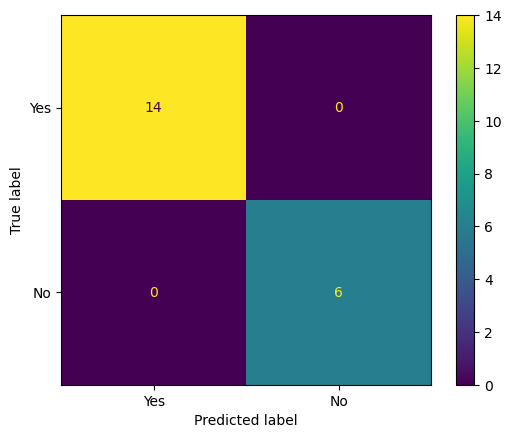

In [29]:
displ = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Yes', 'No'])
displ.plot()
print("Confusion Matrix")

In [31]:
from sklearn.metrics import jaccard_score
print("Jaccard Similarity Score: ", jaccard_score(y_test,y_pred))

Jaccard Similarity Score:  1.0


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

